# Perla Bot | Analytics
## Correlational and inferential analysis
### Perla beta 2, Aug 2020, raul@psicobotica.com 

<hr>
About Perla: <a herf="https://www.psicobotica.com/productos/psicologia-clinica/psicobotica-perla/">Perla Homepage at Psicobōtica</a>
<hr> 


## Dataset with classes - load from file
(direct load from github)



In [1]:
# Loading the table (CSV)

import pandas as pd 

# Using beta 2 dataset 2 version (with classses): 
perla_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/perla-bot/master/data/Perla-beta2-ds2-classes.csv"

perla_df = pd.read_csv(perla_dataset_path, header=0, delimiter=";") 

In [2]:
# Checking data load
perla_df.head()

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed
0,0,1,0,2,0,0,0,0,0,3,...,0,0,0,0,2,44,4ba596c4aefd8188d00162bfef57967c,0,0,0
1,0,3,3,3,0,3,0,0,0,12,...,3,0,0,0,1,43,fef2bf388aa21eace80757369757689c,1,1,1
2,1,1,1,1,1,0,0,0,0,5,...,0,0,0,0,2,39,00feb0b1986f985dab9ba216069c7bfe,2,0,0
3,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,2,37,b712daeaf10b3aac08eb2a88bae125eb,1,0,0
4,0,0,0,1,0,1,0,0,0,2,...,1,0,0,0,1,43,608af5455da8c250a87f81a5ed5c1942,1,0,0


In [3]:
# Checking types
perla_df.dtypes

PI1            int64
PI2            int64
PI3            int64
PI4            int64
PI5            int64
PI6            int64
PI7            int64
PI8            int64
PI9            int64
PPHQ9          int64
PHQ9           int64
I1             int64
I2             int64
I3             int64
I4             int64
I5             int64
I6             int64
I7             int64
I8             int64
I9             int64
Gender         int64
Age            int64
Code          object
Delay          int64
PDepressed     int64
Depressed      int64
dtype: object

In [4]:
# Check number of qualified successfully anonymized participants
perla_df.Code.count()

78

In [5]:
# Check Nulls and NaNs
perla_df[perla_df.isnull().any(axis=1)]

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed


## Correlational analysis

In [46]:
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt

### Items correlation

In [14]:
# Correlation matrix for items
# PI(x) are the PHQ-9 items reported by Perla.
# I(x) are the PHQ-9 items self-reported.
items_corr = perla_df[["PI1", "PI2", "PI3", "PI4", "PI5", "PI6", "PI7", "PI8", "PI9",
                      "I1", "I2", "I3", "I4", "I5", "I6", "I7", "I8", "I9"]].corr()

In [15]:
items_corr

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1.000000,0.571755,0.277495,0.336443,0.154334,0.460890,0.276215,0.340771,0.421039,0.636779,0.687558,0.337830,0.449254,0.438918,0.568644,0.437814,0.333900,0.428690
PI2,0.571755,1.000000,0.297655,0.392903,0.307367,0.584727,0.179280,0.239398,0.413216,0.469226,0.674121,0.411188,0.577050,0.477561,0.659926,0.416504,0.405786,0.436421
PI3,0.277495,0.297655,1.000000,0.222817,0.115159,0.325257,0.188917,0.186767,-0.022363,0.251528,0.355119,0.809895,0.367553,0.384469,0.392740,0.183440,0.150051,0.126188
PI4,0.336443,0.392903,0.222817,1.000000,0.275526,0.497003,0.170619,0.233036,0.203336,0.380987,0.369794,0.260692,0.598334,0.337712,0.491889,0.226629,0.238265,0.133772
PI5,0.154334,0.307367,0.115159,0.275526,1.000000,0.285380,0.154225,0.403517,0.320950,0.166024,0.355093,0.238644,0.398088,0.662816,0.273919,0.372293,0.537451,0.247540
PI6,0.460890,0.584727,0.325257,0.497003,0.285380,1.000000,0.174727,0.331327,0.413316,0.409128,0.533982,0.423741,0.423955,0.508840,0.744498,0.431435,0.377668,0.394202
PI7,0.276215,0.179280,0.188917,0.170619,0.154225,0.174727,1.000000,0.123291,0.238506,0.306585,0.267253,0.094642,0.175791,0.275954,0.286418,0.595838,0.292988,0.304077
PI8,0.340771,0.239398,0.186767,0.233036,0.403517,0.331327,0.123291,1.000000,0.219829,0.129707,0.246783,0.189268,0.301303,0.468429,0.318719,0.188478,0.434246,0.178624
PI9,0.421039,0.413216,-0.022363,0.203336,0.320950,0.413316,0.238506,0.219829,1.000000,0.236254,0.526115,0.094437,0.267635,0.319033,0.498230,0.475948,0.491410,0.830709
I1,0.636779,0.469226,0.251528,0.380987,0.166024,0.409128,0.306585,0.129707,0.236254,1.000000,0.647659,0.288068,0.394219,0.317366,0.489333,0.453480,0.307863,0.316273


In [16]:
cm = sns.light_palette("blue", as_cmap=True)
items_corr.style.background_gradient(cmap=cm).set_precision(2)

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1,0.57,0.28,0.34,0.15,0.46,0.28,0.34,0.42,0.64,0.69,0.34,0.45,0.44,0.57,0.44,0.33,0.43
PI2,0.57,1,0.3,0.39,0.31,0.58,0.18,0.24,0.41,0.47,0.67,0.41,0.58,0.48,0.66,0.42,0.41,0.44
PI3,0.28,0.3,1,0.22,0.12,0.33,0.19,0.19,-0.022,0.25,0.36,0.81,0.37,0.38,0.39,0.18,0.15,0.13
PI4,0.34,0.39,0.22,1,0.28,0.5,0.17,0.23,0.2,0.38,0.37,0.26,0.6,0.34,0.49,0.23,0.24,0.13
PI5,0.15,0.31,0.12,0.28,1,0.29,0.15,0.4,0.32,0.17,0.36,0.24,0.4,0.66,0.27,0.37,0.54,0.25
PI6,0.46,0.58,0.33,0.5,0.29,1,0.17,0.33,0.41,0.41,0.53,0.42,0.42,0.51,0.74,0.43,0.38,0.39
PI7,0.28,0.18,0.19,0.17,0.15,0.17,1,0.12,0.24,0.31,0.27,0.095,0.18,0.28,0.29,0.6,0.29,0.3
PI8,0.34,0.24,0.19,0.23,0.4,0.33,0.12,1,0.22,0.13,0.25,0.19,0.3,0.47,0.32,0.19,0.43,0.18
PI9,0.42,0.41,-0.022,0.2,0.32,0.41,0.24,0.22,1,0.24,0.53,0.094,0.27,0.32,0.5,0.48,0.49,0.83
I1,0.64,0.47,0.25,0.38,0.17,0.41,0.31,0.13,0.24,1,0.65,0.29,0.39,0.32,0.49,0.45,0.31,0.32


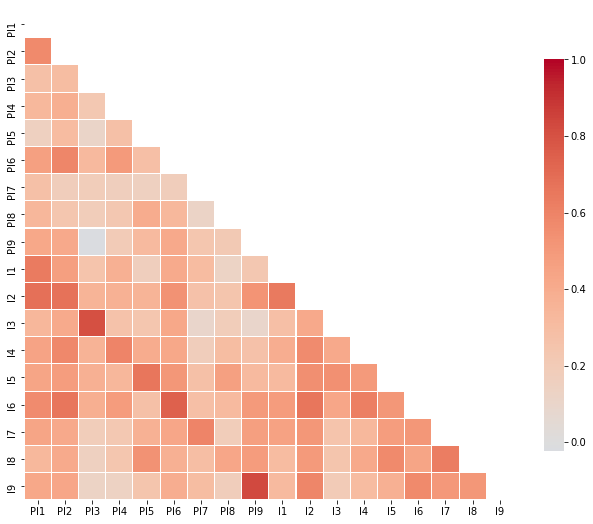

In [44]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(items_corr, dtype=np.bool))

# Set up the matplotlib figure
fig1, ax1 = plt.subplots(figsize=(11, 9))

# cm2 = sns.diverging_palette(380, 1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(items_corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.01, cbar_kws={"shrink": .8})

### Classification Correlation

In [40]:
# Point-biserial correlation 
# https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient 
from scipy import stats

stats.pointbiserialr( perla_df["PDepressed"], perla_df["Depressed"] )

PointbiserialrResult(correlation=0.7399325178132599, pvalue=9.998273310386285e-15)

In [49]:
# One way ANOVA 
stat, p = f_oneway(perla_df["PDepressed"], perla_df["Depressed"])
print('Depression Screening: Statistics=%.3f, p=%.12f' % (stat, p))
# interpret
alpha = 0.001
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Depression Screening: Statistics=1.246, p=0.265979520439
Same distributions (fail to reject H0)


In [53]:
alpha = 0.001
stat, p = f_oneway(perla_df["PI1"], perla_df["I1"])
print('Item 1: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI2"], perla_df["I2"])
print('Item 2: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI3"], perla_df["I3"])
print('Item 3: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI4"], perla_df["I4"])
print('Item 4: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI5"], perla_df["I5"])
print('Item 5: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI6"], perla_df["I6"])
print('Item 6: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI7"], perla_df["I7"])
print('Item 7: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI8"], perla_df["I8"])
print('Item 8: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI9"], perla_df["I9"])
print('Item 9: Statistics=%.3f, p=%.12f' % (stat, p))


Item 1: Statistics=0.100, p=0.752781154728
Item 2: Statistics=0.027, p=0.869016129650
Item 3: Statistics=0.086, p=0.770050593101
Item 4: Statistics=0.846, p=0.359211827404
Item 5: Statistics=0.096, p=0.757145260939
Item 6: Statistics=0.552, p=0.458436651363
Item 7: Statistics=2.663, p=0.104771553902
Item 8: Statistics=4.352, p=0.038620650497
Item 9: Statistics=0.535, p=0.465739459250


## Evaluation of Perla as classifier
Using signal detection theory

In [105]:
# Confusion matrix for depression screening

confusion_matrix_perla = pd.crosstab(perla_df['Depressed'], 
                               perla_df['PDepressed'], 
                               rownames=['Actual (PHQ9)'], 
                               colnames=['Predicted (Perla)'])

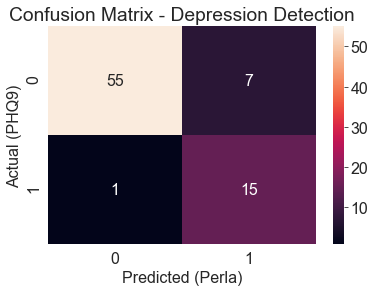

In [106]:
plt.rcParams.update({'font.size': 16})
ax = plt.subplot()
sns.heatmap(confusion_matrix_perla, annot=True, ax = ax)
ax.set_title('Confusion Matrix - Depression Detection'); 

In [108]:
# Confusion matrix statistics: 

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(perla_df['Depressed'], perla_df['PDepressed']).ravel()
(tn, fp, fn, tp)

(55, 7, 1, 15)

In [84]:
# Accuracy of Perla as classifier

from sklearn.metrics import accuracy_score 

# accuracy_score(y_true, y_pred)
acc = accuracy_score(perla_df['Depressed'], perla_df['PDepressed'])
print("The accuracy of Perla is: " + str(acc))

The accuracy of Perla is: 0.8974358974358975


In [104]:
# F1 Score

from sklearn.metrics import f1_score

# f1_score(y_true, y_pred, average='binary')
f1_score(perla_df['Depressed'], perla_df['PDepressed'], average='binary')

0.7894736842105263

In [109]:
# Classification report

from sklearn.metrics import classification_report
target_names = ['No Depression', 'Depression']
print(classification_report(perla_df['Depressed'], perla_df['PDepressed'], target_names=target_names))

               precision    recall  f1-score   support

No Depression       0.98      0.89      0.93        62
   Depression       0.68      0.94      0.79        16

    micro avg       0.90      0.90      0.90        78
    macro avg       0.83      0.91      0.86        78
 weighted avg       0.92      0.90      0.90        78



In [122]:
# AUC - Area under the ROC curve

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(perla_df['Depressed'], perla_df['PDepressed'])
print(roc_auc)

0.9122983870967742


In [154]:
# Perla probability of depression
# y = 1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874)^3.96744)
# 4PL symmetrical sigmoidal

def proba(x):
    return  1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874) ** 3.96744)

In [155]:
# Plot ROC curve

from sklearn.metrics import roc_curve

perla_df['probas'] = perla_df.apply(lambda row: proba(row.PPHQ9), axis=1)

fpr, tpr, thresholds = roc_curve(perla_df['Depressed'], perla_df['probas'], pos_label=0)


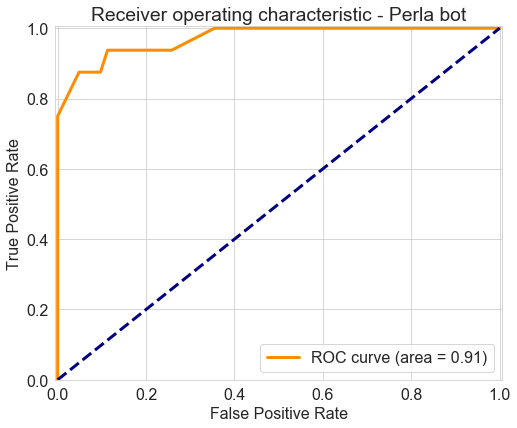

In [158]:
plt.figure(figsize=(8,6.5))
lw = 3

plt.plot(tpr, fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Perla bot')
plt.legend(loc="lower right")
plt.show()

### Classifier evaluation for each item

In [69]:
confusion_matrix_item1 = pd.crosstab(perla_df['I1'], 
                               perla_df['PI1'], 
                               rownames=['Item 1'], 
                               colnames=['Predicted I1'])

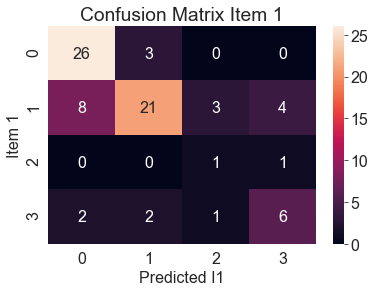

In [75]:
ax1 = plt.subplot()
sns.heatmap(confusion_matrix_item1, annot=True, ax = ax1)
ax1.set_title('Confusion Matrix Item 1');

In [97]:
acc1 = accuracy_score(perla_df['I1'], perla_df['PI1'])
print("The accuracy for item 1 is: " + str(acc1))

The accuracy for item 1 is: 0.6923076923076923


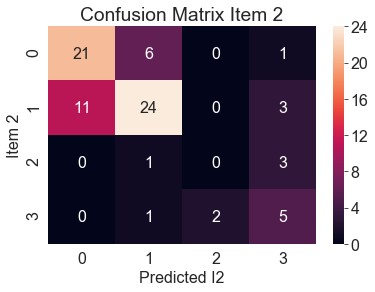

In [74]:
confusion_matrix_item2 = pd.crosstab(perla_df['I2'], 
                               perla_df['PI2'], 
                               rownames=['Item 2'], 
                               colnames=['Predicted I2'])
ax2 = plt.subplot()
sns.heatmap(confusion_matrix_item2, annot=True, ax = ax2)
ax2.set_title('Confusion Matrix Item 2');

In [96]:
acc2 = accuracy_score(perla_df['I2'], perla_df['PI2'])
print("The accuracy for item 2 is: " + str(acc2))

The accuracy for item 2 is: 0.6410256410256411


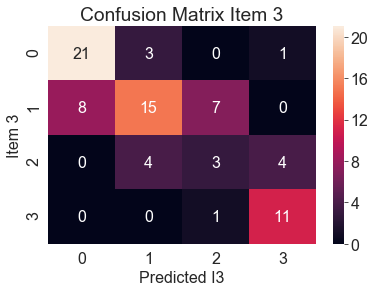

In [73]:
confusion_matrix_item3 = pd.crosstab(perla_df['I3'], 
                               perla_df['PI3'], 
                               rownames=['Item 3'], 
                               colnames=['Predicted I3'])
ax3 = plt.subplot()
sns.heatmap(confusion_matrix_item3, annot=True, ax = ax3)
ax3.set_title('Confusion Matrix Item 3');

In [95]:
acc3 = accuracy_score(perla_df['I3'], perla_df['PI3'])
print("The accuracy for item 3 is: " + str(acc3))

The accuracy for item 3 is: 0.6410256410256411


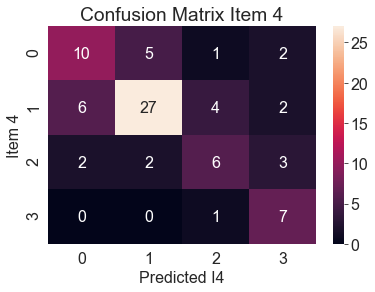

In [77]:
confusion_matrix_item4 = pd.crosstab(perla_df['I4'], 
                               perla_df['PI4'], 
                               rownames=['Item 4'], 
                               colnames=['Predicted I4'])
ax4 = plt.subplot()
sns.heatmap(confusion_matrix_item4, annot=True, ax = ax4)
ax4.set_title('Confusion Matrix Item 4');

In [94]:
acc4 = accuracy_score(perla_df['I4'], perla_df['PI4'])
print("The accuracy for item 4 is: " + str(acc4))

The accuracy for item 4 is: 0.6410256410256411


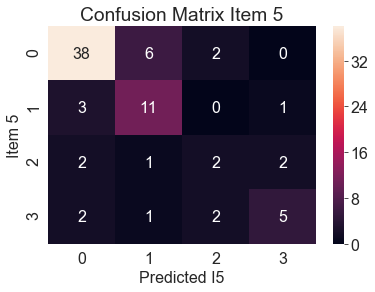

In [78]:
confusion_matrix_item5 = pd.crosstab(perla_df['I5'], 
                               perla_df['PI5'], 
                               rownames=['Item 5'], 
                               colnames=['Predicted I5'])
ax5 = plt.subplot()
sns.heatmap(confusion_matrix_item5, annot=True, ax = ax5)
ax5.set_title('Confusion Matrix Item 5');

In [93]:
acc5 = accuracy_score(perla_df['I5'], perla_df['PI5'])
print("The accuracy for item 5 is: " + str(acc5))

The accuracy for item 5 is: 0.717948717948718


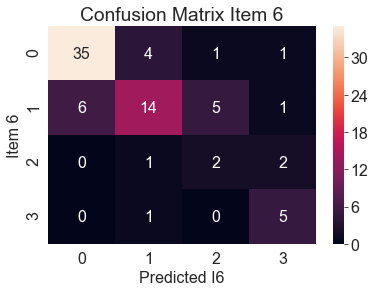

In [79]:
confusion_matrix_item6 = pd.crosstab(perla_df['I6'], 
                               perla_df['PI6'], 
                               rownames=['Item 6'], 
                               colnames=['Predicted I6'])
ax6 = plt.subplot()
sns.heatmap(confusion_matrix_item6, annot=True, ax = ax6)
ax6.set_title('Confusion Matrix Item 6');

In [98]:
acc6 = accuracy_score(perla_df['I6'], perla_df['PI6'])
print("The accuracy for item 6 is: " + str(acc6))

The accuracy for item 6 is: 0.717948717948718


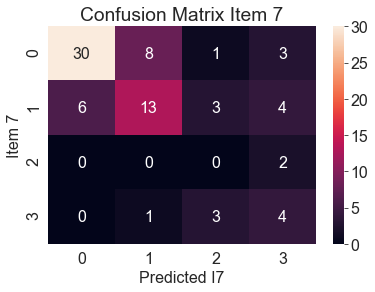

In [80]:
confusion_matrix_item7 = pd.crosstab(perla_df['I7'], 
                               perla_df['PI7'], 
                               rownames=['Item 7'], 
                               colnames=['Predicted I7'])
ax7 = plt.subplot()
sns.heatmap(confusion_matrix_item7, annot=True, ax = ax7)
ax7.set_title('Confusion Matrix Item 7');

In [99]:
acc7 = accuracy_score(perla_df['I7'], perla_df['PI7'])
print("The accuracy for item 7 is: " + str(acc7))

The accuracy for item 7 is: 0.6025641025641025


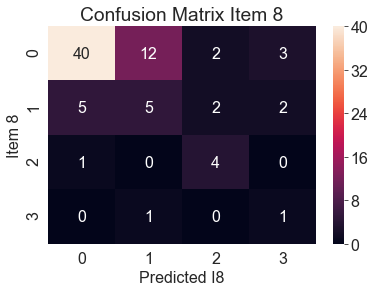

In [81]:
confusion_matrix_item8 = pd.crosstab(perla_df['I8'], 
                               perla_df['PI8'], 
                               rownames=['Item 8'], 
                               colnames=['Predicted I8'])
ax8 = plt.subplot()
sns.heatmap(confusion_matrix_item8, annot=True, ax = ax8)
ax8.set_title('Confusion Matrix Item 8');

In [100]:
acc8 = accuracy_score(perla_df['I8'], perla_df['PI8'])
print("The accuracy for item 8 is: " + str(acc8))

The accuracy for item 8 is: 0.6410256410256411


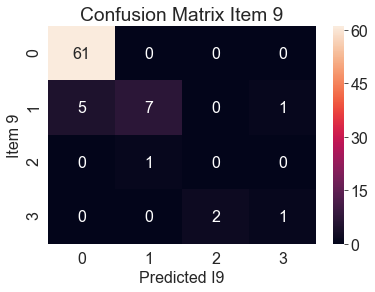

In [82]:
confusion_matrix_item9 = pd.crosstab(perla_df['I9'], 
                               perla_df['PI9'], 
                               rownames=['Item 9'], 
                               colnames=['Predicted I9'])
ax9 = plt.subplot()
sns.heatmap(confusion_matrix_item9, annot=True, ax = ax9)
ax9.set_title('Confusion Matrix Item 9');

In [101]:
acc9 = accuracy_score(perla_df['I9'], perla_df['PI9'])
print("The accuracy for item 9 is: " + str(acc9))

The accuracy for item 9 is: 0.8846153846153846
